<b>Code:<b>

<I>Importing Dependencies<I>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.linear_model import LassoCV

<I>Data Collection and Processing<I>

In [5]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('C:/Users/moham/OneDrive/Desktop/Car Price Prediction/Car Dataset.csv')

In [6]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
# checking the number of rows and columns
car_dataset.shape

(4340, 8)

In [8]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_Name       4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [9]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [10]:
# checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.Car_Name.value_counts())
print(car_dataset.owner.value_counts())


fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
Car_Name
Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: count, Length: 1491, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car     

<I>Encoding the Categorical Data<I>

In [11]:
# Encoding "fuel" column
car_dataset['fuel'] = car_dataset['fuel'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4})

# Encoding "seller_type" column
car_dataset['seller_type'] = car_dataset['seller_type'].replace({'Dealer': 0, 'Individual': 1, 'Trustmark Dealer': 2})

# Encoding "transmission" column
car_dataset['transmission'] = car_dataset['transmission'].replace({'Manual': 0, 'Automatic': 1})

# Encoding "owner" column
car_dataset['owner'] = car_dataset['owner'].replace({'First Owner' : 0, 'Second Owner' : 1, 'Third Owner' : 2, 'Fourth & Above Owner' : 3, 
                                                    'Test Drive Car' : 4})


C:\Users\moham\AppData\Local\Temp\ipykernel_21088\2787228231.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset['fuel'] = car_dataset['fuel'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4})
C:\Users\moham\AppData\Local\Temp\ipykernel_21088\2787228231.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset['seller_type'] = car_dataset['seller_type'].replace({'Dealer': 0, 'Individual': 1, 'Trustmark Dealer': 2})
C:\Users\moham\AppData\Local\Temp\ipykernel_21088\2787228231.py:8: FutureWarni

In [12]:
car_dataset.head()

,Car_Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,1,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,1,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,1,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,1


<I>Splitting the data and Target<I>

In [13]:
X = car_dataset.drop(['Car_Name','selling_price'],axis=1)
Y = car_dataset['selling_price']

In [14]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            1             0      0
1     2007      50000     0            1             0      0
2     2012     100000     1            1             0      0
3     2017      46000     0            1             0      0
4     2014     141000     1            1             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            1             0      1
4336  2014      80000     1            1             0      1
4337  2009      83000     0            1             0      1
4338  2016      90000     1            1             0      0
4339  2016      40000     0            1             0      0

[4340 rows x 6 columns]


In [15]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [16]:
print(car_dataset['fuel'].unique())
print(car_dataset.dtypes)

[0 1 2 3 4]
Car_Name         object
year              int64
selling_price     int64
km_driven         int64
fuel              int64
seller_type       int64
transmission      int64
owner             int64
dtype: object


<I>Splitting Training and Test data<I>

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

<B>Model Training<B>

<B><I>1.Linear Regression<I><B>

In [18]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [19]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

<I>Model Evaluation for Training data<I>

In [20]:
#Prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [21]:
#R Squared error
error_score_1 = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared Error:", error_score_1)

R Squared Error: 0.4276361285018684


<I>Visualize the actual prices & predicted prices<I>

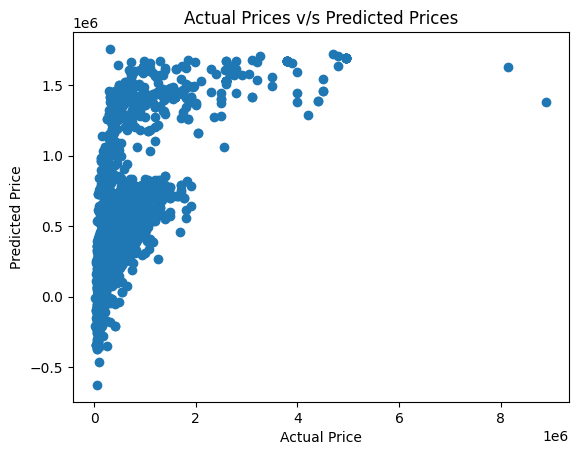

In [22]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices v/s Predicted Prices")
plt.show()

<I>Model Evaluation for Test data<I>

In [23]:
#Prediction on Testing data
test_data_prediction = lin_reg_model.predict(X_test)

In [24]:
#R Squared error
error_score_2 = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error:", error_score_2)

R Squared Error: 0.5027999353753425


<B><I>2. Lasso Regression<I><B>

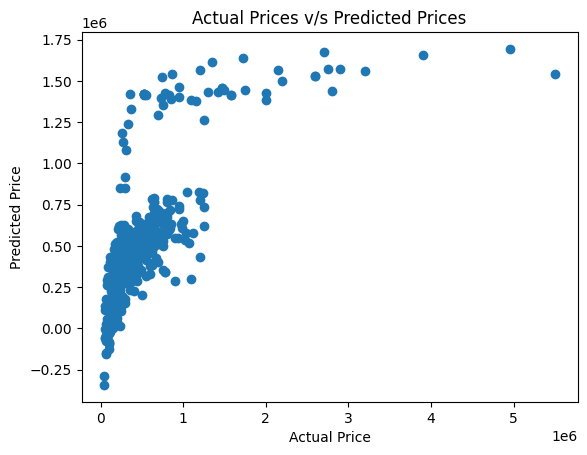

In [25]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices v/s Predicted Prices")
plt.show()

2. <B><I>Lasso Regression<I><B>

<I>Lasso Regression with Cross-Validation to Optimize Alpha<I>

In [26]:
# Initialize LassoCV with cross-validation
lasso_cv = LassoCV(cv=5)  # 5-fold cross-validation
lasso_cv.fit(X_train, Y_train)

# The optimal alpha is chosen by cross-validation
print(f"Optimal alpha: {lasso_cv.alpha_}")

Optimal alpha: 84844286.54119398


In [27]:
# loading the lasso regression model
lasso_reg_model = Lasso(alpha= 84844286.54119398)

In [28]:
lasso_reg_model.fit(X_train, Y_train)

Lasso(alpha=84844286.54119398)

<I>Model Evaluation for Training data<I>

In [29]:
#Prediction on Training data
training_data_prediction = lasso_reg_model.predict(X_train)

In [30]:
#R Squared error
error_score_3 = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared Error:", error_score_3)

R Squared Error: 0.03655502818431888


<I>Visualize the actual prices & predicted prices<I>

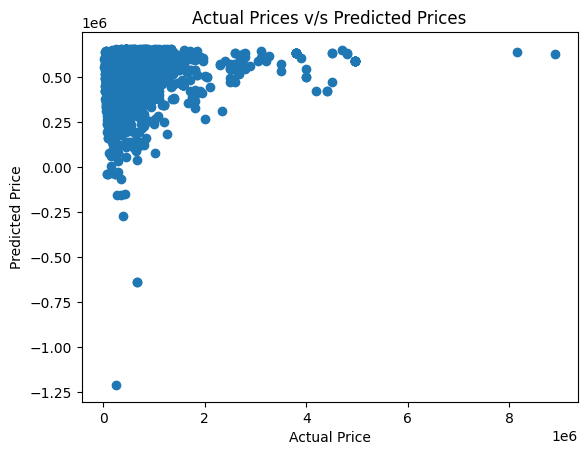

In [31]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices v/s Predicted Prices")
plt.show()

<I>Model Evaluation for Test data<I>

In [32]:
#Prediction on Testing data
test_data_prediction = lasso_reg_model.predict(X_test)

In [33]:
#R Squared error
error_score_4 = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error:", error_score_4)

R Squared Error: 0.03820080045916885


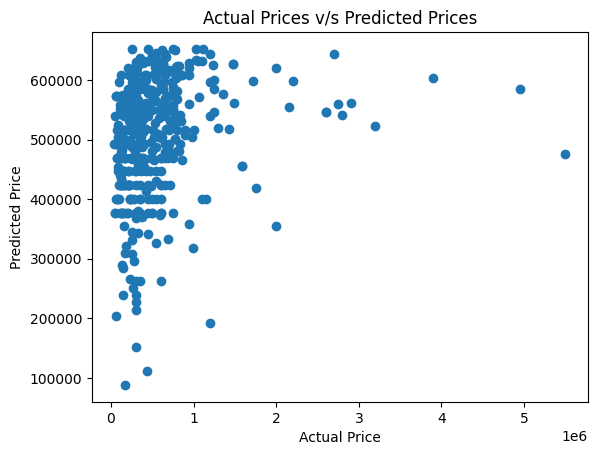

In [34]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices v/s Predicted Prices")
plt.show()

<B>END OF THE CODE<B>